In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
# define constants
X = 3
e = 0.001
# e = 0.00940320

In [231]:
def f(x):
    prefactor = np.sqrt(-(X*(e*X*(X+1)-1)))
    u = (1/(2*X)*(X+1-(X-1)*np.cos(x)))
    return prefactor*(X-1)/(2*X)*np.sin(x)*u/np.sqrt(((X+1)*u**3+e*(X+1)+(e*X**2*(X+1)-X)*u**4-((X**2+1)*(X+1)*e+1)*u**2))

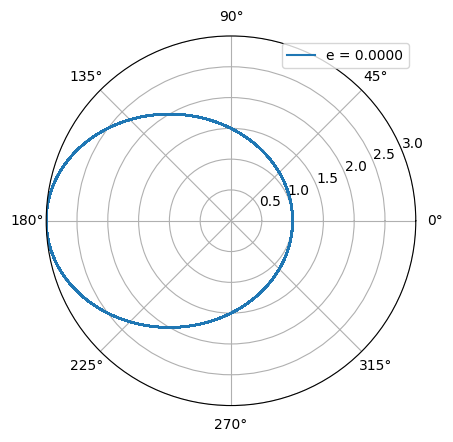

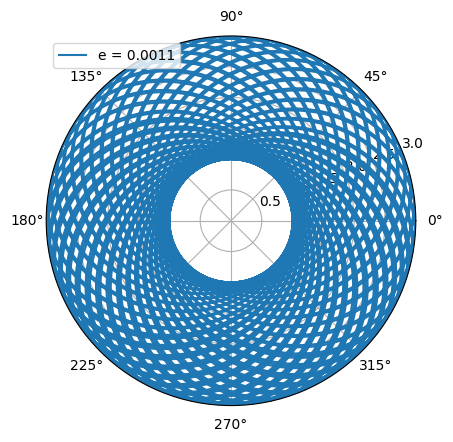

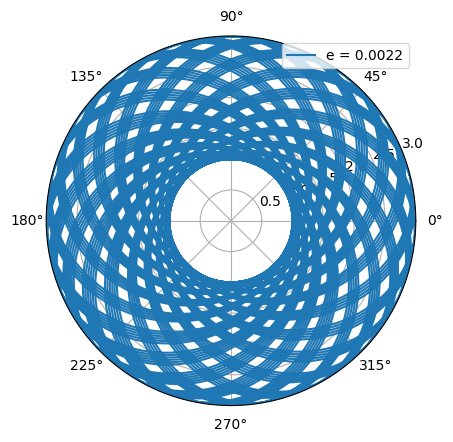

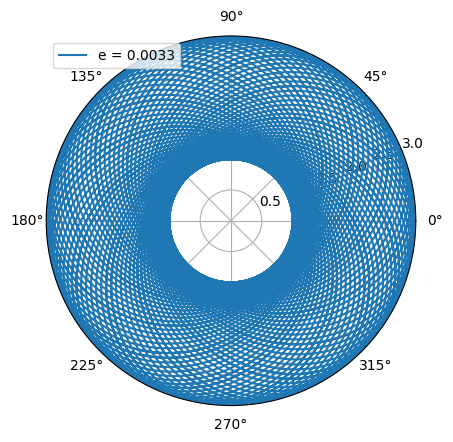

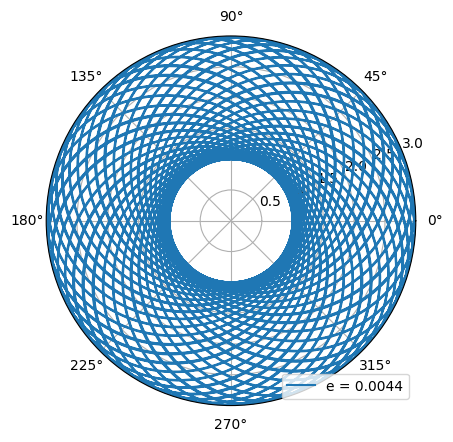

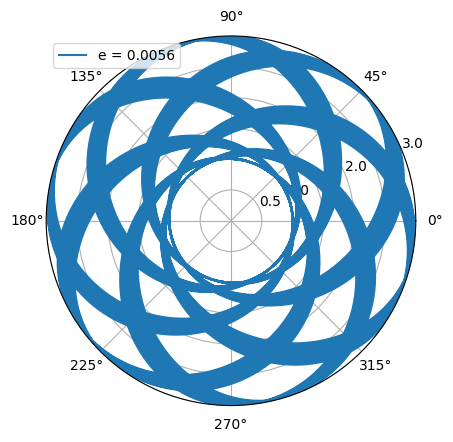

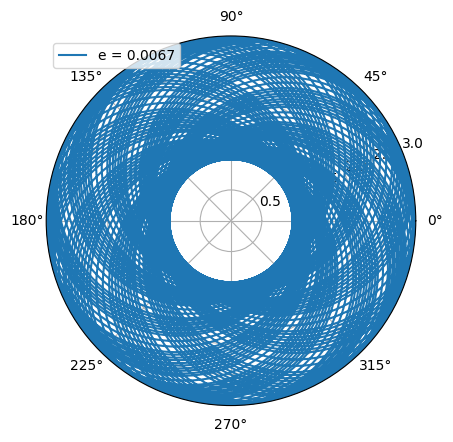

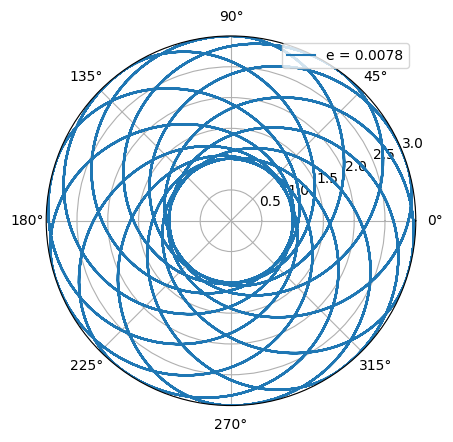

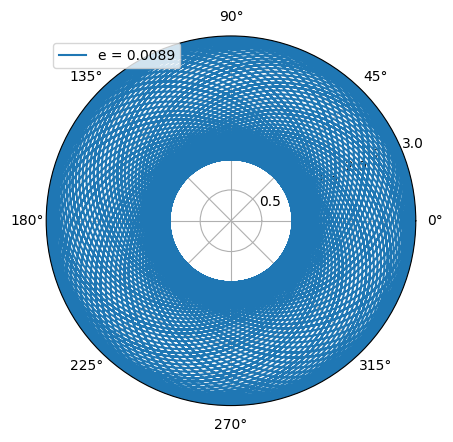

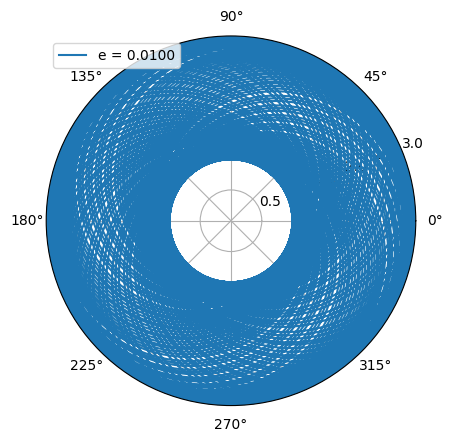

In [5]:
# define constants
X = 3
epsilons = np.linspace(0,0.01,10)

for e in epsilons:
    def f(x):
        prefactor = np.sqrt(-(X*(e*X*(X+1)-1)))
        u = (1/(2*X)*(X+1-(X-1)*np.cos(x)))
        # return prefactor*(X-1)/(2*X)*np.sin(x)*u/np.sqrt(((X+1)*u**3+e*(X+1)+(e*X**2*(X+1)-X)*u**4-((X**2+1)*(X+1)*e+1)*u**2))
        return prefactor/(2*X)*u/np.sqrt(1/(4*X)*(u**2-e*(u+1)*(X+1)*(u*X+1)))

    size = 100
    cycles = 100

    top = np.linspace(0,np.pi,size)

    r0 = 2*X/(X+1-(X-1)*np.cos(top))
    theta0 = np.zeros(size)
    r = np.zeros(2*size*cycles)
    theta = np.zeros(2*size*cycles)

    # get the theta0 array
    for i in range(0,size):
        theta0[i] = quad(f,0,top[i])[0]
        if(np.isnan(theta0[i])):
            theta0[i] = 0

    # populate per cycle
    for c in range(0,cycles):
        for j in range(0,size):
            r[j+2*c*size] = r0[size-j-1]
            theta[j+2*c*size] = theta0[j]+2*c*theta0[size-1]
        for k in range(0,size):
            r[k+size+2*c*size] = r0[k]
            theta[k+size+2*c*size] = theta0[k]+(2*c+1)*theta0[size-1]

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rmax(X)
    ax.legend(["e = %.4f" % e])

C:\Users\tbwil\AppData\Local\Temp\ipykernel_20620\2102310253.py:15: RuntimeWarning: invalid value encountered in sqrt
  return (1/x**2)*np.sqrt(num/denom)
C:\Users\tbwil\AppData\Local\Temp\ipykernel_20620\2102310253.py:29: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  theta0[i] = quad(f,0,top[i])[0]


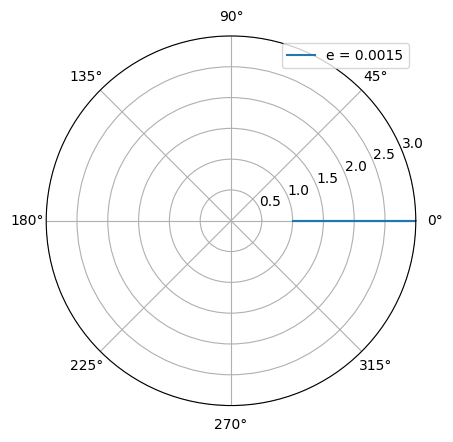

In [24]:
# define constants
X = 3
e = 0.0015
# r_min=1

def f(x):
    prefactor = np.sqrt(-(X*(e*X*(X+1)-1)))
    u = (1/(2*X)*(X+1-(X-1)*np.cos(x)))
    # return prefactor*(X-1)/(2*X)*np.sin(x)*u/np.sqrt(((X+1)*u**3+e*(X+1)+(e*X**2*(X+1)-X)*u**4-((X**2+1)*(X+1)*e+1)*u**2))
    return prefactor/(2*X)*u/np.sqrt(1/(4*X)*(u**2-e*(u+1)*(X+1)*(u*X+1)))

# def f(x):
#     num = X*r_min**2*(1-e*X*(X+1))
#     denom = (x-r_min)*(X*r_min-x)*(1/x**2)*(1-(e/r_min**3)*(x+X*r_min)*(x+r_min)*(X+1)*r_min)
#     return (1/x**2)*np.sqrt(num/denom)

size = 100
cycles = 1

top = np.linspace(0.00001,np.pi-0.00001,size)

r0 = 2*X/(X+1-(X-1)*np.cos(top))
theta0 = np.zeros(size)
r = np.zeros(2*size*cycles)
theta = np.zeros(2*size*cycles)

# get the theta0 array
for i in range(0,size):
    theta0[i] = quad(f,0,top[i])[0]
    if(np.isnan(theta0[i])):
        theta0[i] = 0

# populate per cycle
for c in range(0,cycles):
    for j in range(0,size):
        r[j+2*c*size] = r0[size-j-1]
        theta[j+2*c*size] = theta0[j]+2*c*theta0[size-1]
    for k in range(0,size):
        r[k+size+2*c*size] = r0[k]
        theta[k+size+2*c*size] = theta0[k]+(2*c+1)*theta0[size-1]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(X)
ax.legend(["e = %.4f" % e])

Find epsilon values

In [10]:
# define constants
X = (1+ 0.01671)/(1- 0.01671)
# X =3
Q = 11.45/(2*3600*180)*np.pi+np.pi
# Q = (4/3)*np.pi
iterations = 20
startVal = 0
endVal = 0.01
for iter in range(0,iterations):

    epsilons = np.linspace(startVal,endVal,200)
    min_e = endVal
    max_e = startVal

    for e in epsilons:
        def f(x):
            prefactor = np.sqrt(-(X*(e*X*(X+1)-1)))
            u = (1/(2*X)*(X+1-(X-1)*np.cos(x)))
            # return prefactor*(X-1)/(2*X)*np.sin(x)*u/np.sqrt(((X+1)*u**3+e*(X+1)+(e*X**2*(X+1)-X)*u**4-((X**2+1)*(X+1)*e+1)*u**2))
            return prefactor/(2*X)*u/np.sqrt(1/(4*X)*(u**2-e*(u+1)*(X+1)*(u*X+1)))

        size = 100
        cycles = 100

        top = np.linspace(0,np.pi,size)

        r0 = 2*X/(X+1-(X-1)*np.cos(top))
        theta0 = np.zeros(size)
        r = np.zeros(2*size*cycles)
        theta = np.zeros(2*size*cycles)

        # get the theta0 array
        for i in range(0,size):
            theta0[i] = quad(f,0,top[i])[0]
            if(np.isnan(theta0[i])):
                theta0[i] = 0

        # populate per cycle
        for c in range(0,cycles):
            for j in range(0,size):
                r[j+2*c*size] = r0[size-j-1]
                theta[j+2*c*size] = theta0[j]+2*c*theta0[size-1]
            for k in range(0,size):
                r[k+size+2*c*size] = r0[k]
                theta[k+size+2*c*size] = theta0[k]+(2*c+1)*theta0[size-1]

        delta_theta = theta0[size-1]
        if (np.abs(delta_theta - Q) < 0.1/10**iter):
            if(e <= min_e):
                min_e = e
            if(e >= max_e):
                max_e = e
            # fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
            # ax.plot(theta, r)
            # ax.set_rmax(X)
            # ax.legend(["e = %.10f" % e])
    startVal = min_e
    endVal = max_e

print((endVal+startVal)/2)


2.8001185880047753e-06
